In [ ]:
import urllib.request


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment
from pydub.playback import play
import IPython
from pydub import AudioSegment
from pydub.playback import play
# Download an audio file
urllib.request.urlretrieve("https://tinyurl.com/wx9amev", "metallic-drums.wav")
# Load into PyDub
loop = AudioSegment.from_wav("metallic-drums.wav")
# Play the result
IPython.display.Audio('metallic-drums.wav')

In [ ]:
import soundfile
import numpy as np
# Repeat 2 times
loop2 = loop * 2
loop3 = loop*3
# Get length in milliseconds
length = len(loop2)
# Set fade time
fade_time = int(length * 0.5)
# Fade in and out
faded = loop2.fade_in(fade_time).fade_out(fade_time)
faded.export("faded.mp3", format="mp3")
IPython.display.Audio('faded.mp3')

In [ ]:
# Download another loop
urllib.request.urlretrieve("https://tinyurl.com/yx3k5kw5", "beat.wav")
# Load into PyDub
beat = AudioSegment.from_wav("beat.wav")
IPython.display.Audio('beat.wav')


In [ ]:
# Mix with our original loop
mixed = beat[:length].overlay(loop3)
mixed.export("mixed.mp3", format="mp3")
IPython.display.Audio('mixed.mp3')

In [ ]:
# Filter the beat at 3kHz
filtered = beat.low_pass_filter(3000)
# Mix loop2 with a reversed, panned version
loop = loop2.reverse().pan(-0.5).overlay(loop2.pan(0.5))
# Mix our filtered beat with the new loop at -3dB
final = filtered.overlay(loop2 - 3, loop=True)
final.export("final.wav", format="wav")
IPython.display.Audio('final.wav')

## **Generation of Sound**

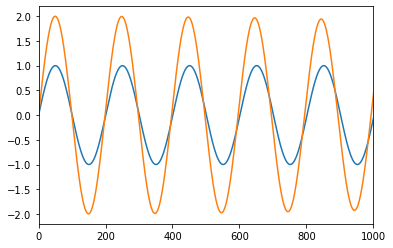

In [ ]:
# Generate a sound
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) # one tone
plt.plot(data)
data = data + np.sin(2*np.pi*224*t) # two tones (two sine waves)
plt.plot(data)
plt.xlim(0,1000)
Audio(data,rate=framerate)


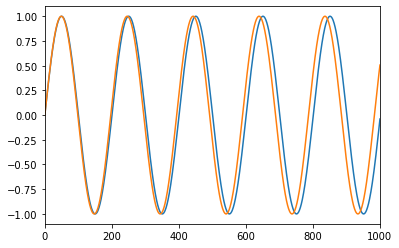

In [ ]:
dataleft = np.sin(2*np.pi*220*t)
dataright = np.sin(2*np.pi*224*t)
plt.plot(dataleft)
plt.plot(dataright)
plt.xlim(0,1000)
Audio([dataleft, dataright],rate=framerate)

## **Text to audio**

In [ ]:
n = int(input('Enter the limit : '))
for i in range(1,n):
  fn = 2**(2*i)+1
  print(fn)

Enter the limit : 5
5
17
65
257


In [ ]:
from gtts import gTTS

text_to_say = "Speech test!"

language = "en"

gtts_object = gTTS(text = text_to_say,
                  lang = language,
                  slow = False)

gtts_object.save("/content/gtts.wav")

In [ ]:
from IPython.display import Audio

Audio("/content/gtts.wav")